<a href="https://colab.research.google.com/github/Chetalibansal/Udaan/blob/main/sih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# set seed for reproducibility
np.random.seed(42)

# number of students
n_students = 50

# generate dummy data
df = pd.DataFrame({
    "student_id": range(1, n_students + 1),
    "attendance_pct_term": np.random.normal(80, 10, n_students).clip(40, 100),
    "attendance_trend": np.random.normal(-1, 5, n_students),  # slope of last 4 weeks
    "avg_test_score": np.random.normal(55, 15, n_students).clip(20, 100),
    "test_score_trend": np.random.normal(-2, 7, n_students),
    "fees_due": np.random.choice([0, 1000, 5000, 10000], n_students, p=[0.6, 0.2, 0.15, 0.05]),
    "days_since_fee_payment": np.random.randint(0, 120, n_students),
})

# create labels (at_risk) based on simple rules
df["at_risk"] = (
    (df.attendance_pct_term < 70) |
    (df.avg_test_score < 45) |
    (df.fees_due > 5000)
).astype(int)

df

,student_id,attendance_pct_term,attendance_trend,avg_test_score,test_score_trend,fees_due,days_since_fee_payment,at_risk
0,1,84.967142,0.620420,33.769439,-0.246550,5000,22,1
1,2,78.617357,-2.925411,48.690320,0.425137,1000,8,0
2,3,86.476885,-4.384610,49.859282,-6.760173,1000,11,0
3,4,95.230299,2.058381,42.965841,-0.374224,1000,116,1
4,5,77.658466,4.154998,52.580714,0.051507,0,0,0
5,6,77.658630,3.656401,61.060763,-7.000460,0,57,0
6,7,95.792128,-5.196088,83.292789,11.060422,5000,0,0
7,8,87.674347,-2.546062,57.618667,1.316830,5000,110,0
8,9,75.305256,0.656317,58.863256,-10.339124,5000,33,0
9,10,85.425600,3.877726,53.883311,2.595875,5000,95,0


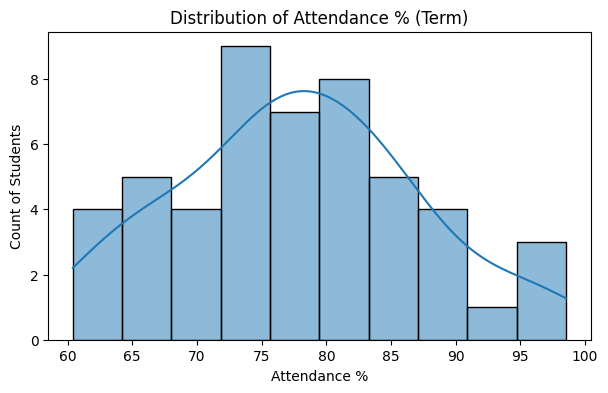

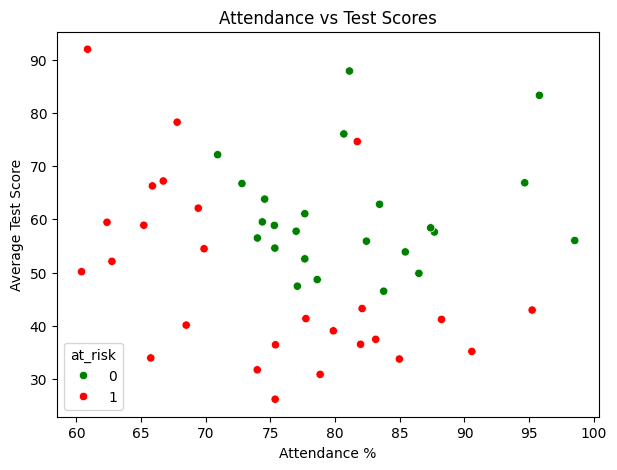

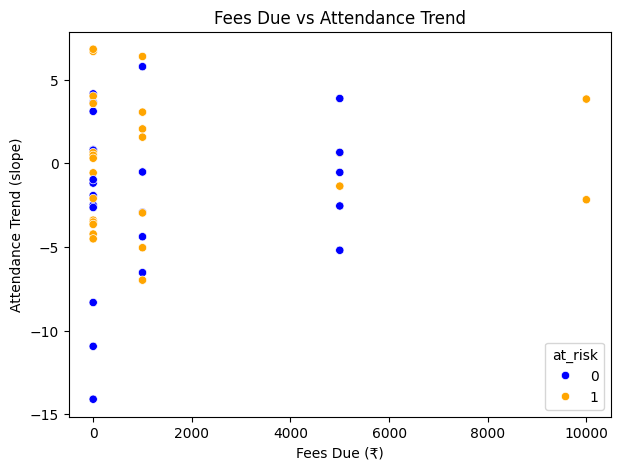

/tmp/ipython-input-3968006790.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="at_risk", palette={'0':"green",'1':"red"})


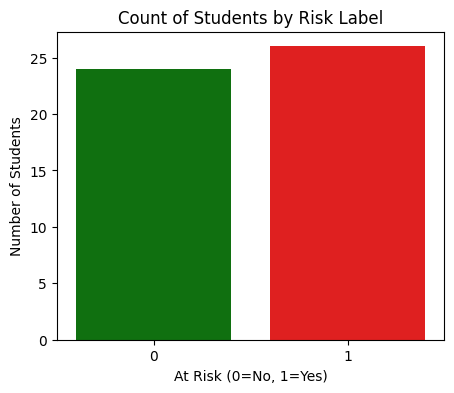

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Distribution of attendance percentage
plt.figure(figsize=(7,4))
sns.histplot(df['attendance_pct_term'], bins=10, kde=True)
plt.title("Distribution of Attendance % (Term)")
plt.xlabel("Attendance %")
plt.ylabel("Count of Students")
plt.show()

# 2. Scatter plot: Attendance vs Test Scores (colored by risk)
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="attendance_pct_term", y="avg_test_score",
                hue="at_risk", palette={0:"green",1:"red"})
plt.title("Attendance vs Test Scores")
plt.xlabel("Attendance %")
plt.ylabel("Average Test Score")
plt.show()

# 3. Fees due vs Attendance trend (risk color)
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="fees_due", y="attendance_trend",
                hue="at_risk", palette={0:"blue",1:"orange"})
plt.title("Fees Due vs Attendance Trend")
plt.xlabel("Fees Due (₹)")
plt.ylabel("Attendance Trend (slope)")
plt.show()

# 4. Count of safe vs at-risk students
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="at_risk", palette={'0':"green",'1':"red"})
plt.title("Count of Students by Risk Label")
plt.xlabel("At Risk (0=No, 1=Yes)")
plt.ylabel("Number of Students")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# select features and target
features = ["attendance_pct_term","attendance_trend","avg_test_score",
            "test_score_trend","fees_due","days_since_fee_payment"]
X = df[features]
y = df["at_risk"]

# normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# wrap in DataFrames for readability
X_train_df = pd.DataFrame(X_train, columns=features)
X_test_df = pd.DataFrame(X_test, columns=features)

# Save processed dataset for reuse
train_data = pd.concat([X_train_df.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test_df.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

train_data

,attendance_pct_term,attendance_trend,avg_test_score,test_score_trend,fees_due,days_since_fee_payment,at_risk
0,0.505727,-1.298749,0.099002,1.214718,-0.139452,0.611125,0
1,-0.009390,1.170624,-0.121366,0.236429,-0.549605,-1.804824,0
2,-1.876257,0.359280,-0.281309,-0.177145,-0.549605,0.062046,1
3,-0.263988,0.362182,0.295300,-1.441343,1.501160,-0.898843,0
4,1.891737,0.686158,-0.759037,0.167686,-0.139452,1.379836,1
5,1.952522,-0.990134,1.915497,2.014034,1.501160,-1.804824,0
6,0.429350,1.098582,1.339454,0.873149,3.551926,1.187658,1
7,-0.254429,0.321580,-1.191458,-1.093840,-0.549605,-1.393014,1
8,1.387663,0.281067,-1.274531,0.078926,-0.549605,0.638579,1
9,-0.364405,1.546391,0.339069,0.371734,-0.139452,1.379836,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Decision Tree model
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluation results
results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_log),
        "Report": classification_report(y_test, y_pred_log, output_dict=True)
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Report": classification_report(y_test, y_pred_dt, output_dict=True)
    }
}

results

{'Logistic Regression': {'Accuracy': 0.9,
  'Report': {'0': {'precision': 0.75,
    'recall': 1.0,
    'f1-score': 0.8571428571428571,
    'support': 3.0},
   '1': {'precision': 1.0,
    'recall': 0.8571428571428571,
    'f1-score': 0.9230769230769231,
    'support': 7.0},
   'accuracy': 0.9,
   'macro avg': {'precision': 0.875,
    'recall': 0.9285714285714286,
    'f1-score': 0.8901098901098901,
    'support': 10.0},
   'weighted avg': {'precision': 0.925,
    'recall': 0.9,
    'f1-score': 0.9032967032967033,
    'support': 10.0}}},
 'Decision Tree': {'Accuracy': 1.0,
  'Report': {'0': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 3.0},
   '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7.0},
   'accuracy': 1.0,
   'macro avg': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 10.0},
   'weighted avg': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 10.0}}}}

In [ ]:
import numpy as np

# Example new student features:
# [attendance_pct_term, attendance_trend, avg_test_score,
#  test_score_trend, fees_due, days_since_fee_payment]
new_students = [
    [60, -3, 55, -5, 5000, 60],   # likely at-risk
    [85, 2, 75, 1, 0, 10],        # likely safe
]

# Scale features using the same scaler
new_students_scaled = scaler.transform(new_students)

# Predict using Decision Tree
pred_dt = dt.predict(new_students_scaled)
print("Decision Tree Predictions:", pred_dt)

# Predict using Logistic Regression
pred_log = log_reg.predict(new_students_scaled)
print("Logistic Regression Predictions:", pred_log)


Decision Tree Predictions: [1 0]
Logistic Regression Predictions: [1 0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
